# 範例重點
## 學習在模型開始前檢查各個環節
1.是否有 GPU 資源 <br />
2.將前處理轉為函式，統一處理訓練、驗證與測試集<br />
3.將超參數變數化，易於重複使用函式、模型等<br />

In [1]:
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [2]:
import os
import keras

os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [4]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.cifar10.load_data()

In [6]:
#data preprocessing
def preproc_x(x, flatten = True):
    x = x/255.0
    if flatten:
        x = x.reshape((len(x),-1))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [7]:
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)


In [11]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation = 'relu', name = "hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation = 'relu', name = "hidden_layer"+str(i+1))(x)
        
    output_layer = keras.layers.Dense(units = output_units, activation = 'softmax', name = "output")(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    
    return model

In [12]:
model = build_mlp(input_shape = x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
#hyper-parameter setting
lr = 0.001
epochs = 20
batch_size = 256

In [14]:
optimizer = keras.optimizers.Adam(lr = lr)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics = ['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test), shuffle = True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 14s 279us/step - loss: 1.9342 - acc: 0.3034 - val_loss: 1.7533 - val_acc: 0.3787
Epoch 2/20
50000/50000 [==============================] - 13s 256us/step - loss: 1.7056 - acc: 0.3919 - val_loss: 1.6620 - val_acc: 0.4098
Epoch 3/20
50000/50000 [==============================] - 12s 241us/step - loss: 1.6102 - acc: 0.4246 - val_loss: 1.5695 - val_acc: 0.4457
Epoch 4/20
50000/50000 [==============================] - 12s 236us/step - loss: 1.5513 - acc: 0.4472 - val_loss: 1.5689 - val_acc: 0.4451
Epoch 5/20
50000/50000 [==============================] - 12s 249us/step - loss: 1.5061 - acc: 0.4654 - val_loss: 1.4898 - val_acc: 0.4728
Epoch 6/20
50000/50000 [==============================] - 12s 243us/step - loss: 1.4655 - acc: 0.4775 - val_loss: 1.5593 - val_acc: 0.4359
Epoch 7/20
50000/50000 [==============================] - 12s 245us/

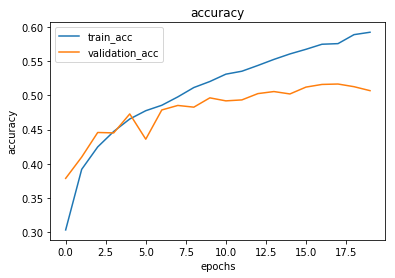

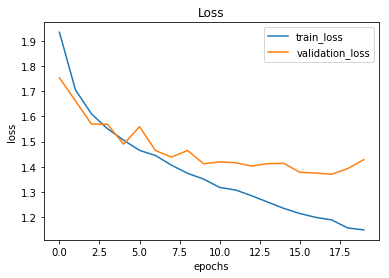

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label = 'train_acc')
plt.plot(history.history['val_acc'], label = 'validation_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('accuracy')
plt.show()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Loss')
plt.show()

# Work
請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練 <br />
請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢<br />
(optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度 <br />

In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np
#Not using NVIDA gpu
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [19]:
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [49]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [50]:
def preproc_x(x, flatten = True):
    if flatten == True:
        x = x.reshape((len(x), -1))
    #normalize to -1 & 1
    xmin = np.min(x)
    xmax = np.max(x)
    x = -1 + 2.0 * (x - xmin) / (xmax - xmin)
    return x

def preproc_y(y,num_classes = 10):
    y = keras.utils.to_categorical(y,num_classes)
    return y

In [51]:
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [55]:
def build_mlp2(input_shape, output_units = 10, num_neurons = [512,512,256,256,128,128]):
    
    input_layer = keras.layers.Input(input_shape)
    for i,n_units in enumerate(num_neurons):
        
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation = 'relu')(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation = 'relu')(x)
    
    output_layer = keras.layers.Dense(units = output_units, activation = 'softmax')(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    
    return model

In [56]:
model = build_mlp2(x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
__________

In [57]:
lr = 0.001
epochs = 20
batch_size = 128

In [59]:
optimizer = keras.optimizers.Adam(lr = lr)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics = ['accuracy'])

In [60]:
history = model.fit(x_train, y_train, epochs = epochs, batch_size = 128, validation_data = (x_test,y_test), shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 21s 423us/step - loss: 1.7028 - acc: 0.3913 - val_loss: 1.5475 - val_acc: 0.4443
Epoch 2/20
50000/50000 [==============================] - 22s 431us/step - loss: 1.4756 - acc: 0.4774 - val_loss: 1.4442 - val_acc: 0.4953
Epoch 3/20
50000/50000 [==============================] - 22s 448us/step - loss: 1.3536 - acc: 0.5205 - val_loss: 1.3895 - val_acc: 0.5170
Epoch 4/20
50000/50000 [==============================] - 23s 452us/step - loss: 1.2615 - acc: 0.5531 - val_loss: 1.3564 - val_acc: 0.5234
Epoch 5/20
50000/50000 [==============================] - 24s 472us/step - loss: 1.1754 - acc: 0.5841 - val_loss: 1.4131 - val_acc: 0.5215
Epoch 6/20
50000/50000 [==============================] - 23s 460us/step - loss: 1.0961 - acc: 0.6133 - val_loss: 1.3838 - val_acc: 0.5254
Epoch 7/20
50000/50000 [==============================] - 25s 503us/step - loss: 1.0143 - acc: 0.6391 - val_loss: 1.

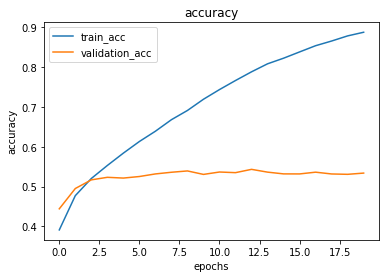

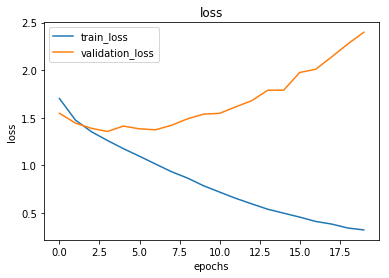

In [61]:
plt.plot(history.history['acc'], label = 'train_acc')
plt.plot(history.history['val_acc'], label = 'validation_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss')
plt.legend()
plt.show()